In [70]:
import numpy as np

principal_components = np.load(f'principal_components.npy')

In [71]:
principal_components.shape

(514590, 87)

In [72]:
principal_components

array([[ 2.83917113e-01, -3.72544610e-02,  6.42436854e-04, ...,
        -1.78297617e-01,  2.46189071e-01, -9.34840041e-02],
       [ 2.57684390e-01, -3.50931710e-02, -2.35653036e-03, ...,
        -8.38002321e-02,  2.18912142e-01,  1.18619978e-01],
       [ 3.61033276e-01,  1.64664784e-01,  2.11712936e-03, ...,
        -3.26336249e-01,  8.93861905e-02,  3.31426105e-02],
       ...,
       [ 8.13566760e-01, -1.12144794e-01, -1.30429565e-02, ...,
         1.01609889e-01, -2.47400951e-02, -1.43986137e-01],
       [ 6.99011447e-01, -1.28131914e-01, -1.16197734e-02, ...,
         4.81435547e-01, -2.42728453e-01,  1.47648511e-01],
       [ 1.24738027e+00, -2.45662837e-01, -2.86330265e-02, ...,
         5.53531305e-03, -2.31815750e-01, -8.03115647e-02]])

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

inertia = []
K_range = range(200, 300)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=628)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [73]:
from sklearn.cluster import KMeans

k = 1000
kmeans = KMeans(n_clusters=k, random_state=628)
kmeans_labels = kmeans.fit_predict(principal_components)

print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[ 1.12619388e-01 -5.54545354e-04  1.55117127e-03 ...  9.69648046e-03
  -6.61085661e-03 -5.04029162e-03]
 [ 6.17623235e+01  1.51330264e+02  5.99087551e-01 ... -2.44541585e+01
  -2.77348994e+01 -4.72188634e+01]
 [ 9.08872993e+00 -4.11082607e+00 -1.00263890e+00 ...  2.64949232e+00
  -1.92351592e+00 -6.66764019e+00]
 ...
 [ 2.61063937e+00 -2.82039639e-01 -1.11874883e-02 ... -2.01624098e-01
  -2.69207783e-02 -3.41861098e-02]
 [ 3.11797611e+00 -2.30015535e-01 -2.77585109e-02 ... -1.20504900e-01
   3.42758270e-02  3.35238978e-01]
 [ 3.39236620e+00 -1.93104852e-01  6.14003629e-03 ...  1.71458955e-01
  -5.96153154e-01  1.91027013e-01]]


In [74]:
import joblib

joblib.dump(kmeans, 'kmeans.pkl')

['kmeans.pkl']

In [80]:
np.save('kmeans_labels.npy', kmeans_labels)

In [75]:
import numpy as np

unique, counts = np.unique(kmeans_labels, return_counts=True)
print("Cluster Distribution:", dict(zip(unique, counts)))

Cluster Distribution: {0: 40899, 1: 3, 2: 3, 3: 207, 4: 533, 5: 92, 6: 99, 7: 1278, 8: 31, 9: 1, 10: 3, 11: 1478, 12: 644, 13: 15, 14: 207, 15: 400, 16: 1, 17: 50, 18: 685, 19: 620, 20: 1, 21: 58, 22: 164, 23: 113, 24: 102, 25: 257, 26: 201, 27: 79, 28: 16, 29: 83, 30: 82, 31: 149, 32: 11, 33: 2068, 34: 376, 35: 605, 36: 207, 37: 233, 38: 1101, 39: 1307, 40: 57, 41: 10, 42: 9, 43: 524, 44: 65, 45: 151, 46: 168, 47: 224, 48: 3, 49: 1, 50: 493, 51: 47, 52: 556, 53: 905, 54: 44, 55: 85, 56: 1937, 57: 135, 58: 1090, 59: 34, 60: 50, 61: 2202, 62: 100, 63: 202, 64: 1189, 65: 1364, 66: 1869, 67: 232, 68: 55, 69: 6, 70: 92, 71: 269, 72: 229, 73: 25, 74: 100, 75: 73, 76: 452, 77: 18, 78: 186, 79: 1090, 80: 212, 81: 632, 82: 1223, 83: 429, 84: 220, 85: 76, 86: 348, 87: 1369, 88: 144, 89: 5, 90: 128, 91: 2, 92: 183, 93: 247, 94: 1150, 95: 830, 96: 269, 97: 64, 98: 54, 99: 140, 100: 1, 101: 462, 102: 753, 103: 491, 104: 3, 105: 109, 106: 133, 107: 440, 108: 50, 109: 389, 110: 6, 111: 477, 112: 369

In [76]:
from sklearn.metrics import silhouette_score

score = silhouette_score(principal_components, kmeans_labels)
print("Silhouette Score:", score)

Silhouette Score: 0.026322181254781075


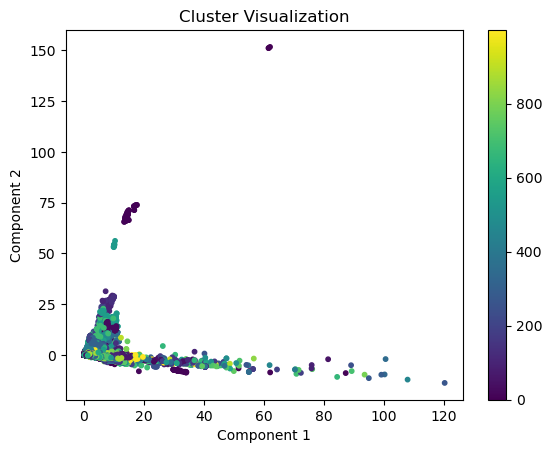

In [77]:
import matplotlib.pyplot as plt

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title("Cluster Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar()
plt.show()

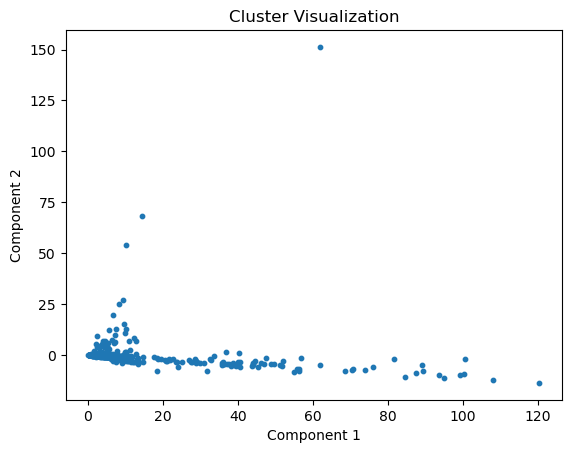

In [78]:
import matplotlib.pyplot as plt

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=10)
plt.title("Cluster Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()